In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import scipy
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')
p0 = data[data['price_range']==0]
p1 = data[data['price_range']==1]
p2 = data[data['price_range']==2]
p3 = data[data['price_range']==3]

sep0 = int(0.8*len(p0))
sep1 = int(0.8*len(p1))
sep2 = int(0.8*len(p2))
sep3 = int(0.8*len(p3))

df_train = pd.concat([p0[:sep0], p1[:sep1], p2[:sep2], p3[:sep3]])
df_test = pd.concat([p0[sep0:], p1[sep1:], p2[sep2:], p3[sep3:]])

In [3]:
df_train = df_train.sample(frac=1)

### Column's descriptions:
**battery_power:** Total energy a battery can store in one time measured in mAh

**blue:** Has bluetooth or not

**clock_speed:** speed at which microprocessor executes instructions

**dual_sim:** Has dual sim support or not

**fc:** Front Camera mega pixels

**four_g:** Has 4G or not

**int_memory:** Internal Memory in Gigabytes

**m_dep:** Mobile Depth in cm

**mobile_wt:** Weight of mobile phone

**n_cores:** Number of cores of processor

**pc:** Primary Camera mega pixels

**px_height:** Pixel Resolution Height

**px_width:** Pixel Resolution Width

**ram:** Random Access Memory in Mega Bytes

**sc_h:** Screen Height of mobile in cm

**sc_w:** Screen Width of mobile in cm

**talk_time:** longest time that a single battery charge will last when you are

**three_g:** Has 3G or not

**touch_screen:** Has touch screen or not

**wifi:** Has wifi or not

**price_range:** This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [4]:
df_train.shape

(1600, 21)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 1274 to 517
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1600 non-null   int64  
 1   blue           1600 non-null   int64  
 2   clock_speed    1600 non-null   float64
 3   dual_sim       1600 non-null   int64  
 4   fc             1600 non-null   int64  
 5   four_g         1600 non-null   int64  
 6   int_memory     1600 non-null   int64  
 7   m_dep          1600 non-null   float64
 8   mobile_wt      1600 non-null   int64  
 9   n_cores        1600 non-null   int64  
 10  pc             1600 non-null   int64  
 11  px_height      1600 non-null   int64  
 12  px_width       1600 non-null   int64  
 13  ram            1600 non-null   int64  
 14  sc_h           1600 non-null   int64  
 15  sc_w           1600 non-null   int64  
 16  talk_time      1600 non-null   int64  
 17  three_g        1600 non-null   int64  
 18  touch_

In [6]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000
mean,1241.006250,0.483125,1.518875,0.50875,4.289375,0.516875,32.361875,0.500750,140.775000,4.516250,9.891875,646.748750,1250.051250,2121.493125,12.330625,5.786875,11.148750,0.761250,0.510000,0.51125,1.500000
std,438.461705,0.499871,0.815435,0.50008,4.343521,0.499871,18.115664,0.287165,35.245294,2.302564,6.086735,445.320301,429.255446,1094.211009,4.211876,4.358707,5.429668,0.426453,0.500056,0.50003,1.118384
min,501.000000,0.000000,0.500000,0.00000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,258.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.00000,0.000000
25%,852.000000,0.000000,0.700000,0.00000,1.000000,0.000000,16.000000,0.200000,109.750000,3.000000,5.000000,282.750000,875.750000,1185.000000,9.000000,2.000000,6.750000,1.000000,0.000000,0.00000,0.750000
50%,1236.000000,0.000000,1.500000,1.00000,3.000000,1.000000,32.000000,0.500000,141.500000,4.000000,10.000000,562.500000,1249.500000,2153.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.00000,1.500000
75%,1616.250000,1.000000,2.200000,1.00000,7.000000,1.000000,48.000000,0.800000,171.000000,7.000000,15.000000,954.000000,1616.250000,3060.000000,16.000000,9.000000,16.000000,1.000000,1.000000,1.00000,2.250000
max,1998.000000,1.000000,3.000000,1.00000,18.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1949.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.00000,3.000000


### **Delete outliers**

In [7]:
for cols in df_train.columns:
    if df_train[cols].dtype == 'int64' or df_train[cols].dtype == 'float64':
        Q1 = df_train[cols].quantile(0.25)
        Q3 = df_train[cols].quantile(0.75)
        IQR = Q3 - Q1
        lower_range = Q1 - 1.5 * IQR
        upper_range = Q3 + 1.5 * IQR
        
        indexs = df_train[(df_train[cols] > upper_range) | (df_train[cols] < lower_range)].index
        df_train.drop(indexs, inplace=True)
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1274,1602,0,2.7,0,4,1,46,0.6,118,1,5,273,1062,1862,16,9,2,1,0,1,1
1039,504,1,0.5,1,2,1,46,0.9,172,5,14,280,1795,2085,13,5,8,1,0,0,1
729,1135,1,2.8,1,9,0,43,0.4,158,1,11,690,1589,3204,18,13,6,1,0,0,3
800,1439,0,0.9,0,12,1,20,0.8,147,1,17,626,932,1790,19,12,15,1,0,1,1
357,880,0,2.0,1,1,1,50,0.5,194,7,3,1116,1381,827,15,9,6,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,1820,1,1.7,1,0,1,64,0.6,161,1,3,1157,1951,574,10,2,18,1,1,0,1
860,1829,1,0.5,0,0,1,15,0.4,160,5,7,729,1267,2080,16,11,12,1,0,1,2
123,1379,0,1.1,0,5,1,36,0.8,200,2,7,538,1376,3426,5,4,17,1,1,1,3
271,730,0,2.1,1,0,1,4,0.1,89,8,2,302,1247,1210,19,15,4,1,1,1,0


### **Check if we have duplicated rows**

In [8]:
df_train.drop_duplicates(inplace = True)
df_train.shape

(1208, 21)

### **Unique values of each column**

In [9]:
for c in df_train.columns:
    print('Column *' + c + '* unique values:')
    print(df_train[c].unique())

Column *battery_power* unique values:
[1602  504 1135 1439  880  660  891 1174  676 1184 1380  852  705 1266
  954 1108 1692  774 1744 1066  701 1254  885 1536 1093 1872  712 1671
  848 1497  589 1733  989  966 1856  685  948  728  595 1694 1754  543
  772 1097 1104 1986 1715  569  717 1395 1727  506 1329  955 1876  846
 1928  946 1957 1408 1122 1800 1723 1663 1616  838 1549 1559 1413 1456
 1627  851  600  503 1910 1275 1441  674  642 1959 1821 1031 1127  840
 1640 1712 1039  675 1878 1164 1851 1552 1923 1541  987  819 1210  623
 1074 1661 1002 1479 1170 1617  545 1372 1126  633 1421 1344 1791 1735
 1860 1187 1788 1713 1755  694 1814 1729 1786  664  805  706 1572  574
  911 1936 1563  519 1623 1880 1672 1993  663 1270 1924  803 1264 1520
 1366  659 1770 1540 1379 1347 1425 1633 1100 1133 1868  867 1721 1231
  765 1265  999 1638 1325  980 1632  729 1490 1997  635 1853 1260 1438
 1407  979 1403 1236  558 1149  723  584 1426 1462 1558  835 1775  708
 1162  541 1337 1695 1154 1796  547  62

### **Data visualization**

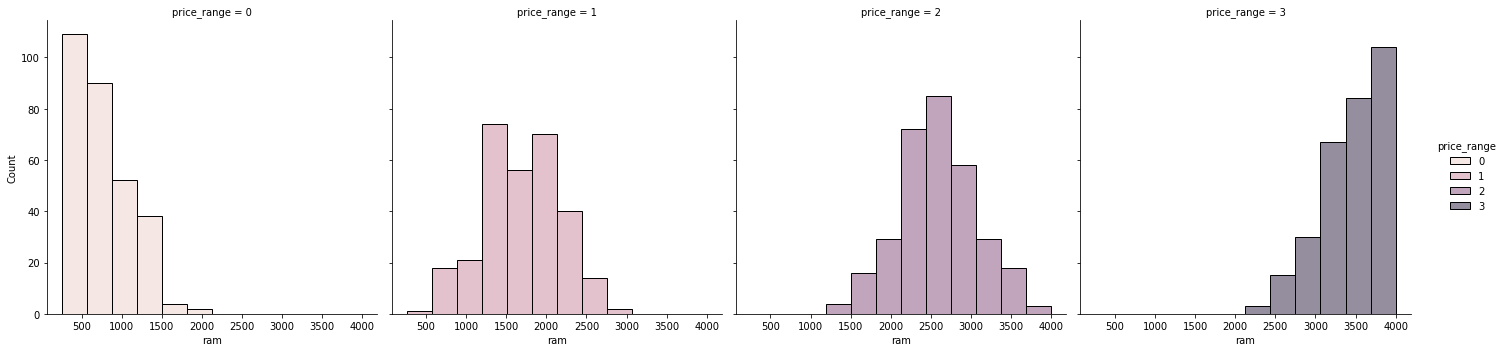

In [10]:
sns.displot(data=df_train, x="ram", hue="price_range", col="price_range")
plt.show()

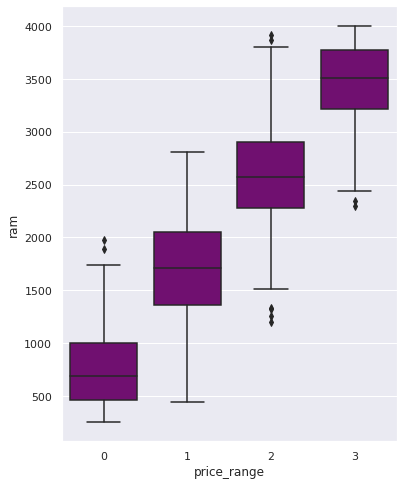

In [11]:
plt.figure(figsize=(6, 8))
sns.set(style="darkgrid")
sns.boxplot(x=df_train["price_range"], y=df_train["ram"], color='purple')
plt.show()

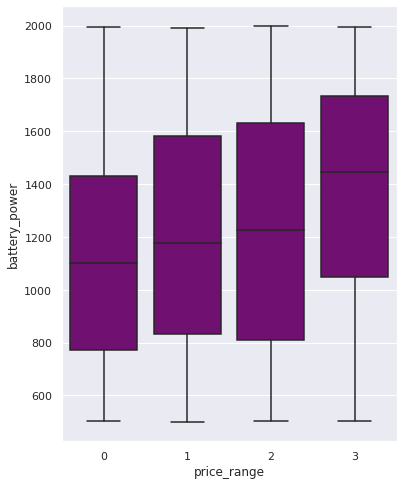

In [12]:
plt.figure(figsize=(6, 8))
sns.set(style="darkgrid")
sns.boxplot(x=df_train["price_range"], y=df_train["battery_power"], color='purple')
plt.show()

In [13]:
chart=alt.Chart(df_train).mark_circle(size=20).encode(
    x='ram',
    y='battery_power',
    color='price_range:N'
).interactive().properties(
    width=600, height=300
)
chart

alt.Chart(...)

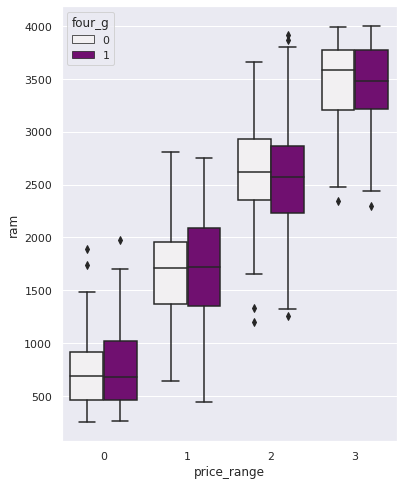

In [14]:
plt.figure(figsize=(6, 8))
sns.set(style="darkgrid")
df = sns.load_dataset('iris')
sns.boxplot(x=df_train["price_range"], y=df_train["ram"], hue=df_train['four_g'], color='purple')
plt.show()

Text(0.5, 1.0, 'Violin Plot of Price Range by Ram, Separated by 4G')

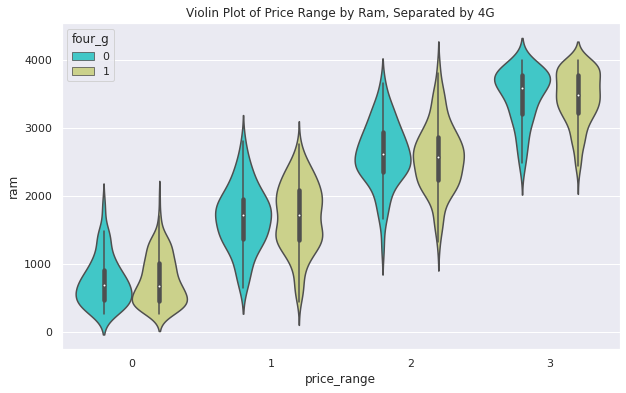

In [15]:
plt.figure(figsize=(10,6))
sns.violinplot(x='price_range',y="ram", hue='four_g',data=df_train, palette='rainbow')
plt.title("Violin Plot of Price Range by Ram, Separated by 4G")

In [16]:
chart=alt.Chart(df_train).mark_circle(size=20).encode(
    x='n_cores',
    y='ram',
    color='price_range'
).interactive().properties(
    width=600, height=300
)
chart

alt.Chart(...)

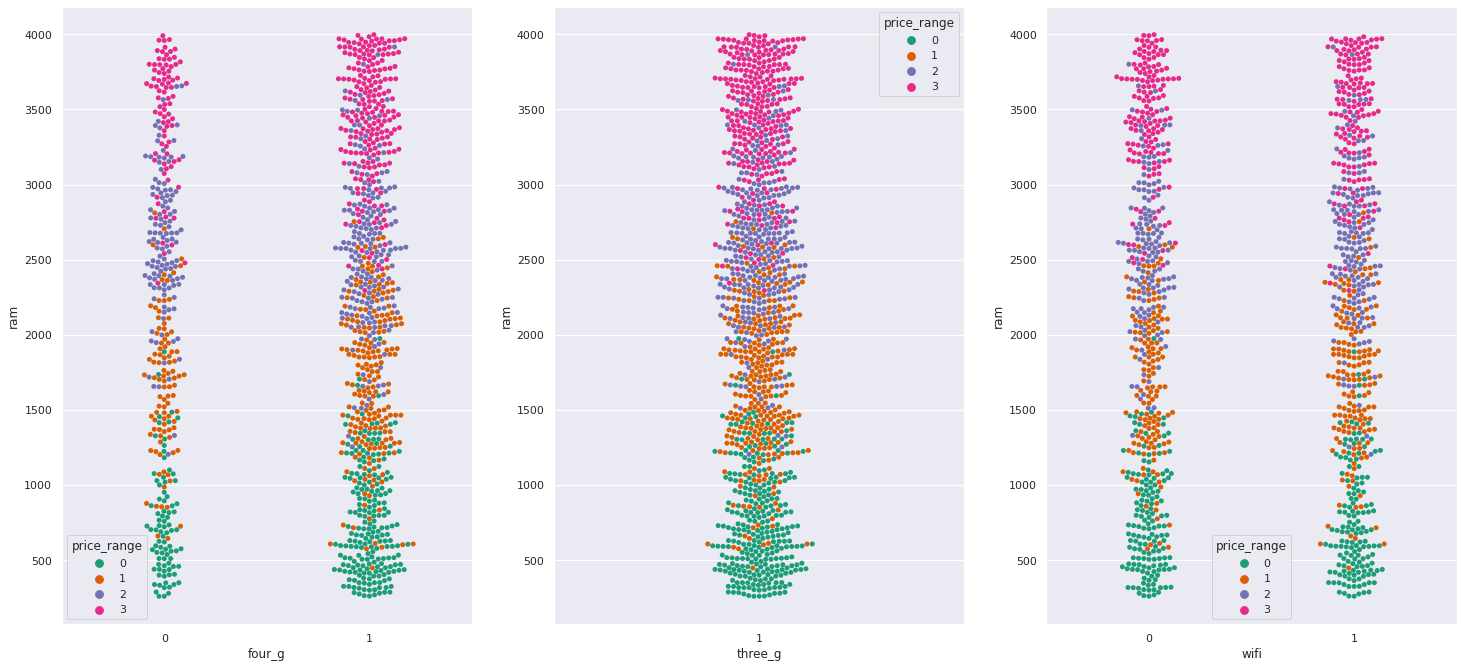

In [17]:
f, ax = plt.subplots(figsize=(25, 25))
plt.subplot(2,3,1)
ax=sns.swarmplot(x="four_g", y="ram", hue="price_range",
              palette="Dark2", data=df_train)
ax=sns.set(style="darkgrid")

plt.subplot(2,3,2)
ax=sns.swarmplot(x="three_g", y="ram", hue="price_range",
              palette="Dark2", data=df_train)
ax=sns.set(style="darkgrid")

plt.subplot(2, 3, 3)
ax=sns.swarmplot(x="wifi", y="ram", hue="price_range",
              palette="Dark2", data=df_train)
ax=sns.set(style="darkgrid")

In [18]:
chart=alt.Chart(df_train).mark_circle(size=20).encode(
    x='px_width',
    y='px_height',
    color='price_range:N'
).interactive().properties(
    width=600, height=300
)
chart

alt.Chart(...)

### **Hypothesis tests**

### q1: The average number of cores, in price range of 3 is 6.

In [19]:
statics, p = scipy.stats.ttest_1samp(df_train[df_train['price_range'] == 3].n_cores, 6)
print("p value:", p)

p value: 4.2960675997042104e-24


##### p value is less than 0.05 so that the H0 is declined.

### q2: The average amount of battery power is 1241.

In [20]:
statics, p_value = scipy.stats.ttest_1samp(df_train["battery_power"], 1241)
print("p value:", p_value)

p value: 0.8410815339994593


##### p value is more than 0.05 so that the H0 is accepted. (due to data description we know that statement is correct.)

### q3: Price range and touch screen are not related. (both categorical)

In [21]:
contingency_table = pd.crosstab(df_train["touch_screen"], df_train["price_range"], margins=True)
contingency_table

price_range,0,1,2,3,All
touch_screen,,,,,
0,132,147,161,149,589
1,163,149,153,154,619
All,295,296,314,303,1208


In [22]:
chi2_stat , p_value , dof , expected = scipy.stats.chi2_contingency(contingency_table.values)
print("p value:", p_value)

p value: 0.9454723168495832


##### p value is more than 0.05. H0 is accepted and they are not realated.

### q4: Price range and bluetooth are not related. (both categorical)

In [23]:
contingency_table = pd.crosstab(df_train["blue"], df_train["price_range"], margins=True)
contingency_table

price_range,0,1,2,3,All
blue,,,,,
0,158,160,168,156,642
1,137,136,146,147,566
All,295,296,314,303,1208


In [24]:
chi2_stat , p_value , dof , expected = scipy.stats.chi2_contingency(contingency_table.values)
print("p value:", p_value)

p value: 0.9998946315164954


##### p value is more than 0.05. H0 is accepted and they are not realated.

### q5: Internal memory and ram are not realted. (both numerical)

In [25]:
cor , p_value = scipy.stats.spearmanr(df_train["int_memory"],df_train["ram"])
print("p value:", p_value)

p value: 0.2378298469482512


##### p value is more than 0.05. H0 is accepted and they are not realated.

### **Logistic regression**

In [26]:
l_train = df_train["price_range"]
df_train.drop(columns="price_range", inplace=True)

l_test = df_test["price_range"]
df_test.drop(columns="price_range", inplace=True)

In [27]:
logreg = LogisticRegression(multi_class='ovr')
logreg.fit(df_train, l_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(multi_class='ovr')

In [28]:
lgr_predict = logreg.predict(df_test)
logreg.score(df_test, l_test)

0.6825

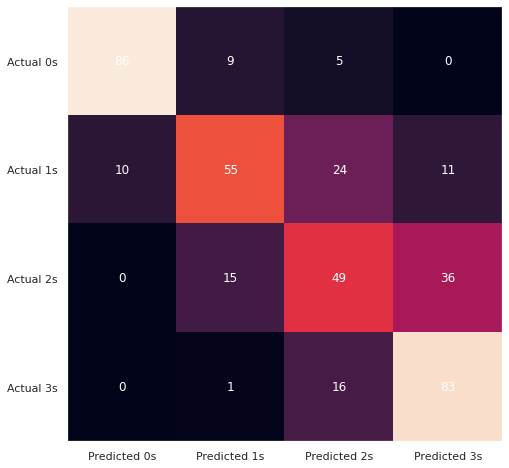

In [29]:
cm = confusion_matrix(l_test, lgr_predict)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2, 3), ticklabels=('Predicted 0s', 'Predicted 1s', 'Predicted 2s', 'Predicted 3s'))
ax.yaxis.set(ticks=(0, 1, 2, 3), ticklabels=('Actual 0s', 'Actual 1s', 'Actual 2s', 'Actual 3s'))
ax.set_ylim(3.5, -0.5)
for i in range(4):
    for j in range(4):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [30]:
logreg = LogisticRegression(multi_class='ovr', max_iter=500)
logreg.fit(df_train, l_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(max_iter=500, multi_class='ovr')

In [31]:
lgr_predict = logreg.predict(df_test)
logreg.score(df_test, l_test)

0.6975

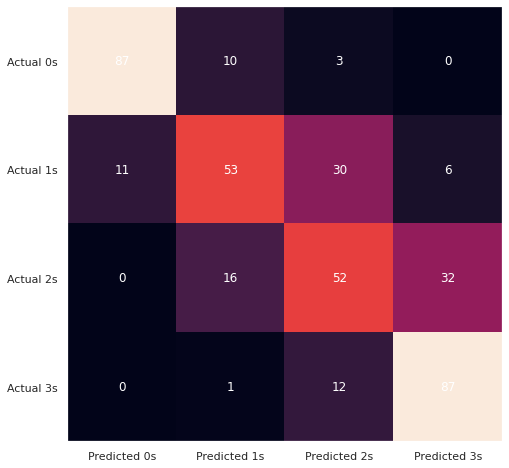

In [32]:
cm = confusion_matrix(l_test, lgr_predict)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2, 3), ticklabels=('Predicted 0s', 'Predicted 1s', 'Predicted 2s', 'Predicted 3s'))
ax.yaxis.set(ticks=(0, 1, 2, 3), ticklabels=('Actual 0s', 'Actual 1s', 'Actual 2s', 'Actual 3s'))
ax.set_ylim(3.5, -0.5)
for i in range(4):
    for j in range(4):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [33]:
logreg = LogisticRegression(multi_class='ovr', max_iter=500, solver='newton-cg')
logreg.fit(df_train, l_train)

LogisticRegression(max_iter=500, multi_class='ovr', solver='newton-cg')

In [34]:
lgr_predict = logreg.predict(df_test)
logreg.score(df_test, l_test)

0.85

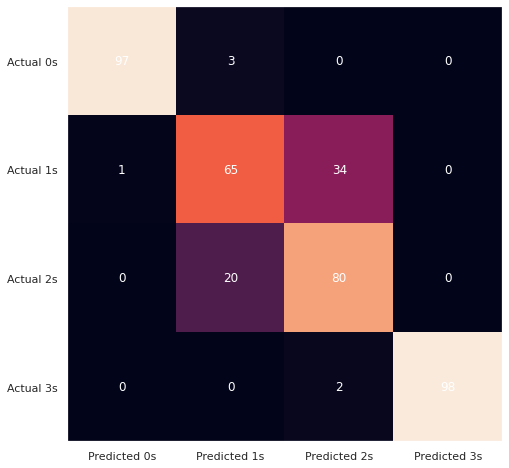

In [35]:
cm = confusion_matrix(l_test, lgr_predict)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2, 3), ticklabels=('Predicted 0s', 'Predicted 1s', 'Predicted 2s', 'Predicted 3s'))
ax.yaxis.set(ticks=(0, 1, 2, 3), ticklabels=('Actual 0s', 'Actual 1s', 'Actual 2s', 'Actual 3s'))
ax.set_ylim(3.5, -0.5)
for i in range(4):
    for j in range(4):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

### **Handling imbalanced data**

In [36]:
l_train.value_counts()

2    314
3    303
1    296
0    295
Name: price_range, dtype: int64

### **Scaling data**

#### **Min-Max scaler**

In [37]:
mms = preprocessing.MinMaxScaler().fit(df_train)
df_train_mms = mms.transform(df_train)
df_test_mms = mms.transform(df_test)

In [38]:
df_train_mms = pd.DataFrame(df_train_mms, columns=df_train.columns)
df_test_mms = pd.DataFrame(df_test_mms, columns=df_train.columns)

In [39]:
logreg = LogisticRegression(multi_class='ovr', max_iter=500, solver='newton-cg')
logreg.fit(df_train_mms, l_train)

LogisticRegression(max_iter=500, multi_class='ovr', solver='newton-cg')

In [40]:
lgr_predict = logreg.predict(df_test_mms)
logreg.score(df_test_mms, l_test)

0.775

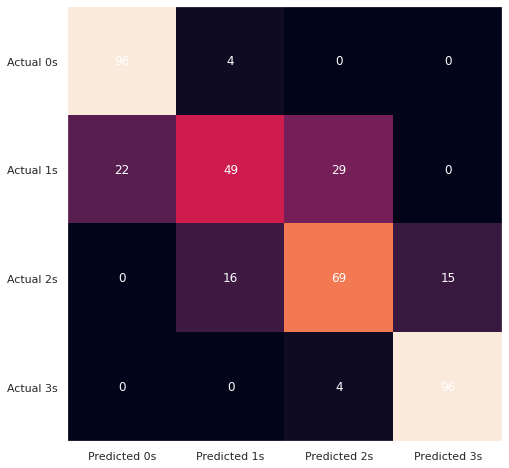

In [41]:
cm = confusion_matrix(l_test, lgr_predict)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2, 3), ticklabels=('Predicted 0s', 'Predicted 1s', 'Predicted 2s', 'Predicted 3s'))
ax.yaxis.set(ticks=(0, 1, 2, 3), ticklabels=('Actual 0s', 'Actual 1s', 'Actual 2s', 'Actual 3s'))
ax.set_ylim(3.5, -0.5)
for i in range(4):
    for j in range(4):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

#### **Quantile scaler**

In [42]:
quantile = QuantileTransformer(output_distribution='normal')

df_train_q = quantile.fit_transform(df_train)
df_test_q = quantile.transform(df_test)

In [43]:
df_train_q = pd.DataFrame(df_train_q, columns=df_train.columns)
df_test_q = pd.DataFrame(df_test_q, columns=df_train.columns)

In [44]:
logreg = LogisticRegression(multi_class='ovr', max_iter=500, solver='newton-cg')
logreg.fit(df_train_q, l_train)

LogisticRegression(max_iter=500, multi_class='ovr', solver='newton-cg')

In [45]:
lgr_predict = logreg.predict(df_test_q)
logreg.score(df_test_q, l_test)

0.78

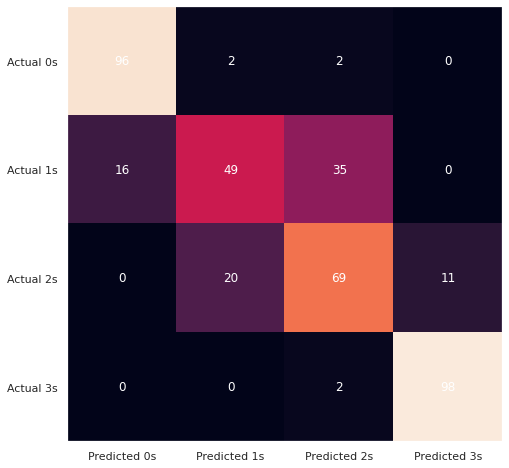

In [46]:
cm = confusion_matrix(l_test, lgr_predict)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2, 3), ticklabels=('Predicted 0s', 'Predicted 1s', 'Predicted 2s', 'Predicted 3s'))
ax.yaxis.set(ticks=(0, 1, 2, 3), ticklabels=('Actual 0s', 'Actual 1s', 'Actual 2s', 'Actual 3s'))
ax.set_ylim(3.5, -0.5)
for i in range(4):
    for j in range(4):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

#### **Robust scaler**

In [47]:
trans = RobustScaler()

df_train_rb = trans.fit_transform(df_train)
df_test_rb = trans.transform(df_test)

In [48]:
df_train_rb = pd.DataFrame(df_train_rb, columns=df_train.columns)
df_test_rb = pd.DataFrame(df_test_rb, columns=df_train.columns)

In [49]:
logreg = LogisticRegression(multi_class='ovr', max_iter=500, solver='newton-cg')
logreg.fit(df_train_rb, l_train)

LogisticRegression(max_iter=500, multi_class='ovr', solver='newton-cg')

In [50]:
lgr_predict = logreg.predict(df_test_rb)
logreg.score(df_test_rb, l_test)

0.805

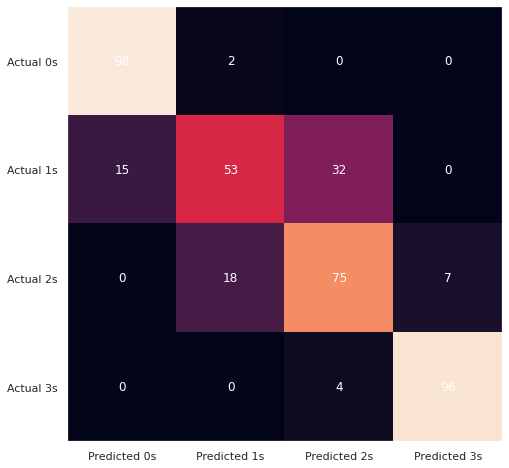

In [51]:
cm = confusion_matrix(l_test, lgr_predict)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2, 3), ticklabels=('Predicted 0s', 'Predicted 1s', 'Predicted 2s', 'Predicted 3s'))
ax.yaxis.set(ticks=(0, 1, 2, 3), ticklabels=('Actual 0s', 'Actual 1s', 'Actual 2s', 'Actual 3s'))
ax.set_ylim(3.5, -0.5)
for i in range(4):
    for j in range(4):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

#### **Standard scaler**

In [52]:
trans = StandardScaler()

df_train_st = trans.fit_transform(df_train)
df_test_st = trans.transform(df_test)

In [53]:
df_train_st = pd.DataFrame(df_train_st, columns=df_train.columns)
df_test_st = pd.DataFrame(df_test_st, columns=df_train.columns)

In [54]:
logreg = LogisticRegression(multi_class='ovr', max_iter=500, solver='newton-cg')
logreg.fit(df_train_st, l_train)

LogisticRegression(max_iter=500, multi_class='ovr', solver='newton-cg')

In [55]:
lgr_predict = logreg.predict(df_test_st)
logreg.score(df_test_st, l_test)

0.8175

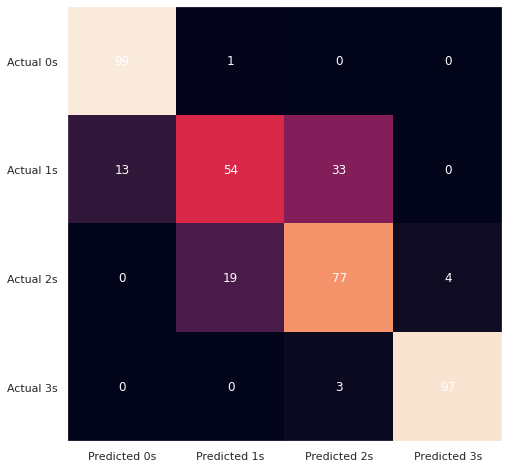

In [56]:
cm = confusion_matrix(l_test, lgr_predict)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2, 3), ticklabels=('Predicted 0s', 'Predicted 1s', 'Predicted 2s', 'Predicted 3s'))
ax.yaxis.set(ticks=(0, 1, 2, 3), ticklabels=('Actual 0s', 'Actual 1s', 'Actual 2s', 'Actual 3s'))
ax.set_ylim(3.5, -0.5)
for i in range(4):
    for j in range(4):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

### **PCA**

#### **pov = 0.75**

In [57]:
pca = PCA(n_components = 0.75, svd_solver = 'full')
 
df_train_75 = pca.fit_transform(df_train_st)
df_test_75 = pca.transform(df_test_st)

In [58]:
pca.n_components_

13

In [59]:
logreg = LogisticRegression(multi_class='ovr', max_iter=500, solver='newton-cg')
logreg.fit(df_train_75, l_train)

LogisticRegression(max_iter=500, multi_class='ovr', solver='newton-cg')

In [60]:
lgr_predict = logreg.predict(df_test_75)
logreg.score(df_test_75, l_test)

0.7075

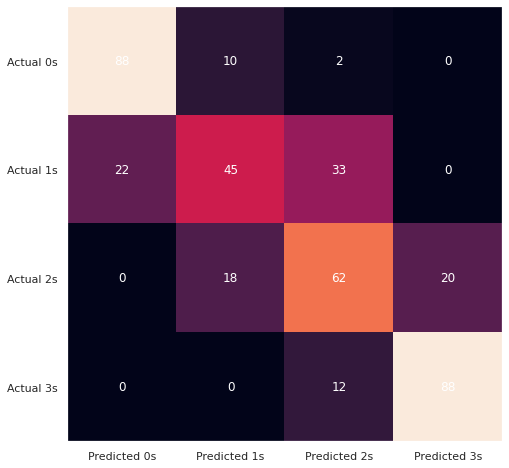

In [61]:
cm = confusion_matrix(l_test, lgr_predict)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2, 3), ticklabels=('Predicted 0s', 'Predicted 1s', 'Predicted 2s', 'Predicted 3s'))
ax.yaxis.set(ticks=(0, 1, 2, 3), ticklabels=('Actual 0s', 'Actual 1s', 'Actual 2s', 'Actual 3s'))
ax.set_ylim(3.5, -0.5)
for i in range(4):
    for j in range(4):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

#### **pov = 0.8**

In [62]:
pca = PCA(n_components = 0.8, svd_solver = 'full')
 
df_train_8 = pca.fit_transform(df_train_st)
df_test_8 = pca.transform(df_test_st)

In [63]:
pca.n_components_

14

In [64]:
logreg = LogisticRegression(multi_class='ovr', max_iter=500, solver='newton-cg')
logreg.fit(df_train_8, l_train)

LogisticRegression(max_iter=500, multi_class='ovr', solver='newton-cg')

In [65]:
lgr_predict = logreg.predict(df_test_8)
logreg.score(df_test_8, l_test)

0.745

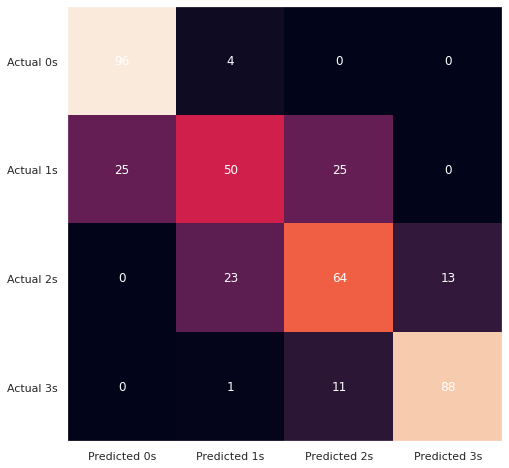

In [66]:
cm = confusion_matrix(l_test, lgr_predict)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2, 3), ticklabels=('Predicted 0s', 'Predicted 1s', 'Predicted 2s', 'Predicted 3s'))
ax.yaxis.set(ticks=(0, 1, 2, 3), ticklabels=('Actual 0s', 'Actual 1s', 'Actual 2s', 'Actual 3s'))
ax.set_ylim(3.5, -0.5)
for i in range(4):
    for j in range(4):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

#### **pov = 0.9**

In [67]:
pca = PCA(n_components = 0.9, svd_solver = 'full')
 
df_train_9 = pca.fit_transform(df_train_st)
df_test_9 = pca.transform(df_test_st)

In [68]:
pca.n_components_

16

In [69]:
logreg = LogisticRegression(multi_class='ovr', max_iter=500, solver='newton-cg')
logreg.fit(df_train_9, l_train)

LogisticRegression(max_iter=500, multi_class='ovr', solver='newton-cg')

In [70]:
lgr_predict = logreg.predict(df_test_9)
logreg.score(df_test_9, l_test)

0.815

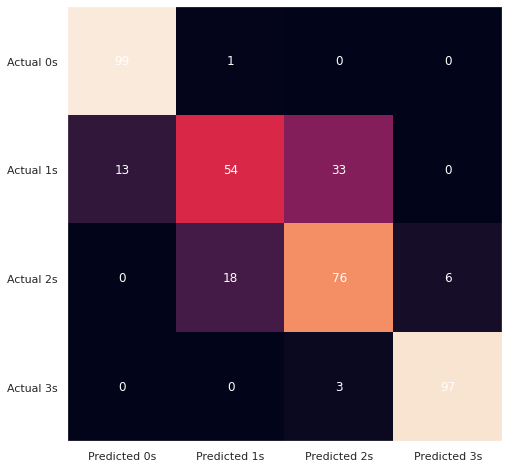

In [71]:
cm = confusion_matrix(l_test, lgr_predict)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2, 3), ticklabels=('Predicted 0s', 'Predicted 1s', 'Predicted 2s', 'Predicted 3s'))
ax.yaxis.set(ticks=(0, 1, 2, 3), ticklabels=('Actual 0s', 'Actual 1s', 'Actual 2s', 'Actual 3s'))
ax.set_ylim(3.5, -0.5)
for i in range(4):
    for j in range(4):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

#### **pov = 0.95**


In [72]:
pca = PCA(n_components = 0.95, svd_solver = 'full')
 
df_train_95 = pca.fit_transform(df_train_st)
df_test_95 = pca.transform(df_test_st)

In [73]:
pca.n_components_

17

In [74]:
logreg = LogisticRegression(multi_class='ovr', max_iter=500, solver='newton-cg')
logreg.fit(df_train_95, l_train)

LogisticRegression(max_iter=500, multi_class='ovr', solver='newton-cg')

In [75]:
lgr_predict = logreg.predict(df_test_95)
logreg.score(df_test_95, l_test)

0.82

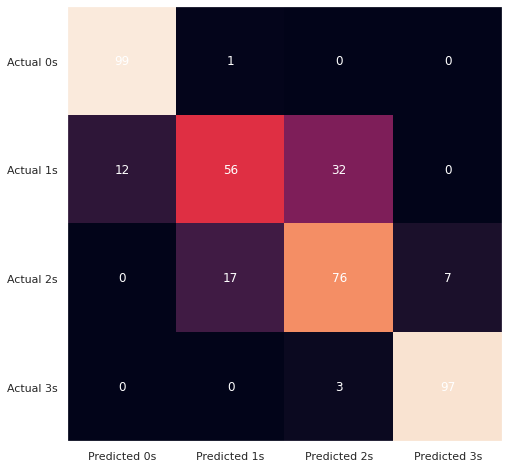

In [76]:
cm = confusion_matrix(l_test, lgr_predict)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2, 3), ticklabels=('Predicted 0s', 'Predicted 1s', 'Predicted 2s', 'Predicted 3s'))
ax.yaxis.set(ticks=(0, 1, 2, 3), ticklabels=('Actual 0s', 'Actual 1s', 'Actual 2s', 'Actual 3s'))
ax.set_ylim(3.5, -0.5)
for i in range(4):
    for j in range(4):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

#### **pov = 0.99**


In [77]:
pca = PCA(n_components = 0.99, svd_solver = 'full')
 
df_train_99 = pca.fit_transform(df_train_st)
df_test_99 = pca.transform(df_test_st)

In [78]:
pca.n_components_

19

In [79]:
logreg = LogisticRegression(multi_class='ovr', max_iter=500, solver='newton-cg')
logreg.fit(df_train_99, l_train)

LogisticRegression(max_iter=500, multi_class='ovr', solver='newton-cg')

In [80]:
lgr_predict = logreg.predict(df_test_99)
logreg.score(df_test_99, l_test)

0.8175

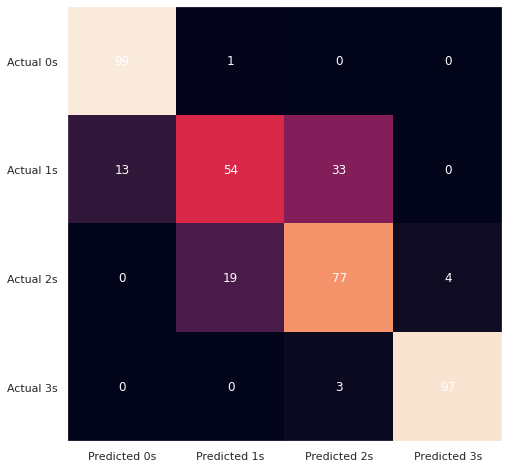

In [81]:
cm = confusion_matrix(l_test, lgr_predict)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2, 3), ticklabels=('Predicted 0s', 'Predicted 1s', 'Predicted 2s', 'Predicted 3s'))
ax.yaxis.set(ticks=(0, 1, 2, 3), ticklabels=('Actual 0s', 'Actual 1s', 'Actual 2s', 'Actual 3s'))
ax.set_ylim(3.5, -0.5)
for i in range(4):
    for j in range(4):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

### **imbalencing the data**

In [82]:
imb_l_train = l_train.replace([1,2,3],4)
imb_l_test = l_test.replace([1,2,3],4)
imb_l_train.value_counts()

4    913
0    295
Name: price_range, dtype: int64

<AxesSubplot:ylabel='price_range'>

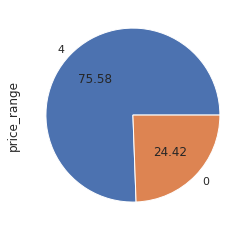

In [83]:
imb_l_train.value_counts().plot.pie(autopct='%.2f')

#### **Random oversampling**

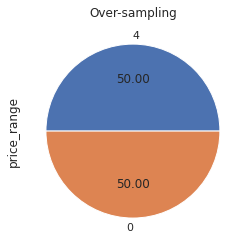

In [84]:
ros = RandomOverSampler(sampling_strategy="not majority")
df_train_res, l_train_res = ros.fit_resample(df_train, imb_l_train)

ax = l_train_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [85]:
trans = StandardScaler()

df_train_res_st = trans.fit_transform(df_train_res)

In [86]:
df_train_res_st = pd.DataFrame(df_train_res_st, columns=df_train.columns)

In [87]:
logreg = LogisticRegression(multi_class='ovr', max_iter=500, solver='newton-cg')
logreg.fit(df_train_res_st, l_train_res)

LogisticRegression(max_iter=500, multi_class='ovr', solver='newton-cg')

In [88]:
lgr_predict = logreg.predict(df_test_st)
logreg.score(df_test_st, imb_l_test)

0.85

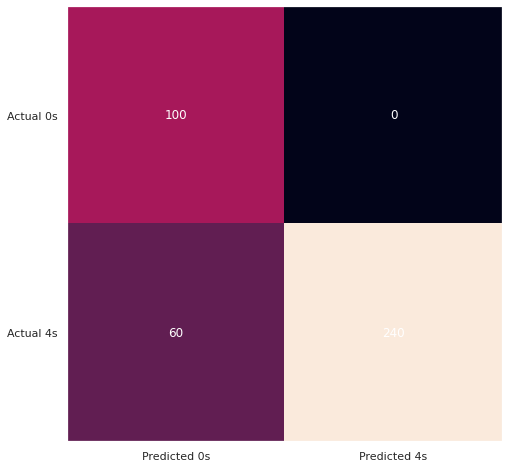

In [89]:
cm = confusion_matrix(imb_l_test, lgr_predict)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 4s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 4s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()